## **Estimation of the number of mice to be used in a pharmacological experiment.**

Drug X has been developed with a high anti-tumor power. A preclinical study is proposed to test its effectiveness in mice, but the ethics committee asks to estimate the number of mice to be used in the study to ensure a statistical power of at least 80%. To do this, an estimate is made that mice without the drug develop tumors in 4 weeks of at least 100 mm3 with a standard deviation of 30. In a group that receives the drug, the tumor is expected to reach a maximum of 70 mm3, therefore the effect is 30.


Sample size per group for a statistical power of 80.0% is 17


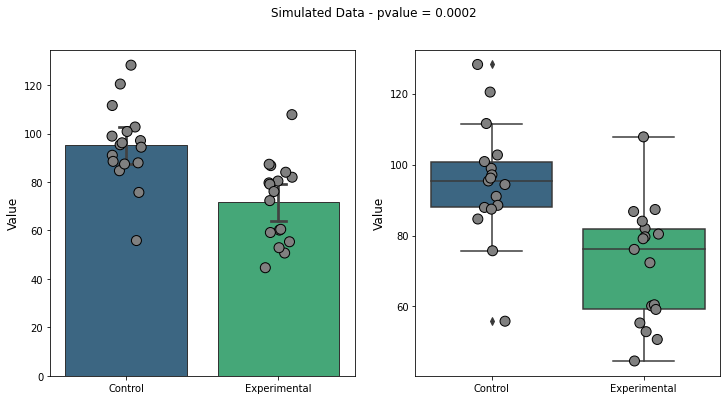

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import tt_ind_solve_power
from scipy.stats import ttest_ind


# Define test parameters
mean_difference = 20     # Difference between group means
sigma = 20               # Standard deviation
alpha = 0.05             # Significance level = the probability of making a Type I error, which occurs when you reject the null hypothesis when it is actually true
power = 0.80             # Power of the test (1 - beta); Beta = the probability of making a Type II error (failing to reject the null hypothesis when it is actually false)

# Calculate effect size
effect_size = mean_difference / sigma

# Calculate sample size per group
sample_size = tt_ind_solve_power(effect_size=effect_size, 
                                 alpha=alpha, 
                                 power=power, 
                                 alternative='two-sided')
bsize = round(sample_size)

#Run stats:

# Generate random sample data
bmean = 100
#np.random.seed(42)
#np.random.rand(4)

group_names = ['Control', 'Experimental']
data = {
    'Group': np.repeat(group_names, bsize),
    'Value': np.concatenate([np.random.normal(bmean, sigma, bsize), np.random.normal(bmean-mean_difference, sigma, bsize)])
}

# Create DataFrame
df = pd.DataFrame(data)

stats, pval = ttest_ind(df.Value[df.Group == 'Control'], df.Value[df.Group == 'Experimental'], equal_var=False)

print(f'Sample size per group for a statistical power of {power*100}% is {bsize}')

# Plotting
fig, ax = plt.subplots(1,2, figsize=(12, 6))
hax = ax[0]
sns.barplot(data=df, ax = hax, x='Group', y='Value', capsize=0.1, palette="viridis", edgecolor='0.2')
sns.stripplot(data=df, ax = hax, x='Group', y='Value', s = 10, color="0.5", edgecolor='k', linewidth = 1)
hax.set_xlabel(None)
hax.set_ylabel("Value", fontsize = 12)

hax = ax[1]
#sns.histplot(data=df, ax = hax, x='Value',hue = 'Group', element='poly')
sns.boxplot(data=df, ax = hax, x='Group', y='Value', palette="viridis")
sns.stripplot(data=df, ax = hax, x='Group', y='Value', s = 10, color="0.5", edgecolor='k', linewidth = 1)
hax.set_xlabel(None)
hax.set_ylabel("Value", fontsize = 12)

plt.suptitle(f'Simulated Data - pvalue = {pval:.4f}')
plt.show()
